<a href="https://colab.research.google.com/github/Jenn-mawia/HamoyeAI/blob/main/Machine_Learning_Regression_Predicting_Energy_Efficiency_of_Buildings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# **Simple Linear regression**

<Axes: xlabel='relative_compactness', ylabel='cooling_load'>

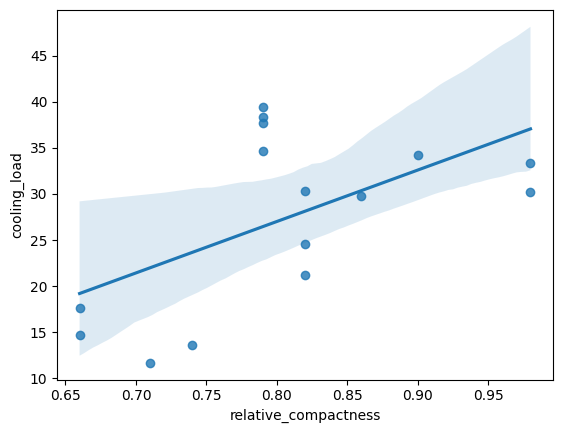

In [4]:
df = pd.read_excel('ENB2012_data.xlsx')

# rename columns
column_names = {'X1': 'relative_compactness', 'X2': 'surface_area', 'X3': 'wall_area', 
           'X4': 'roof_area', 'X5': 'overall_height', 'X6': 'orientation', 'X7': 'glazing_area', 
           'X8': 'glazing_area_distribution', 'Y1': 'heating_load', 'Y2': 'cooling_load'}

df = df.rename(columns = column_names)

# select a sample of the data
simple_linear_reg_df = df[['relative_compactness', 'cooling_load']].sample(15, random_state = 0)

# regression plot
sns.regplot(x='relative_compactness', y='cooling_load', data=simple_linear_reg_df)

**Assumptions for Linear regression**

- Linearity - relationship between the variables is linear such that a straight line is the line of best fit.
- Homoscedasticity: the residuals or prediction errors are of equal or constant variance(the variance of the residuals should be uniform). 
- Normality: the residuals are of a normal distribution with the mean and median at 0. 
- Independence of the observations - it is assumed that the variables are independent of each other without any strong correlation between them






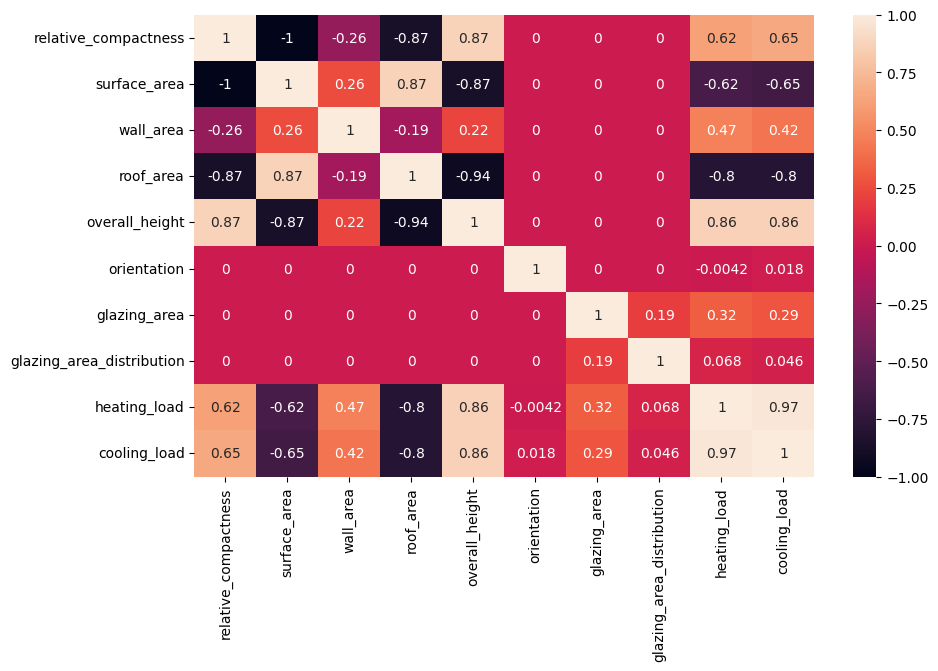

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr('spearman'), annot=True)
plt.show()

The dataset shows a strong correlation between relative compactness and surface area, relative compactness and overall height, surface area and roof area. 



Overall, before inferences are drawn from a linear regression model, all the assumptions discussed above must have been met.

- **Residual sum of squares and minimizing the cost function**

A cost function is a measure of the performance of a model i.e. how far or close the predicted values are to the real values. The objective is to minimise the cost function in order for the model to continuously learn to obtain better results. In linear regression, the cost function can be defined as the sum of squared errors in a training set. The squares of the residuals are taken to penalise errors farther from the line of best fit more than those closer to the line and obtain the best parameter values. 

- **Gradient descent and coordinate descent algorithm**

Gradient descent is an optimization algorithm that minimizes a cost function by specifying the direction to move towards to obtain a local or global minima. This is done by initially starting with random values then iteratively updating the values until the minimum cost is obtained.  A learning rate is usually chosen to determine the step size to be taken for each iteration. It is important to carefully select this parameter because, if a small step is chosen, it will take a long time to converge to the minimum cost while if too large, it can result in an overshoot surpassing the location of the minimum cost.

# **Multiple Linear Regression**

- Collinearity - A situation where two or more of the predictors have a strong correlation is known as **multicollinearity**

To resolve this, one of the correlated predictors is selected and the other removed from the data.


**Polynomial Regression** model is considered a linear regression model that can be used when a curvilinear relationship exists between the predictors and the response variable.



## **Measuring Regression Performance**

**1. Mean Absolute Error (MAE)**
 - It calculates the sum of the  average of the absolute error between the predicted values and the true values. 
 - It is unable to give information about the model overshooting or undershooting. **The smaller the MAE is, the better the model**.
 - If the MAE is 0, the model is perfect and accurately predicts results which is almost impossible.  The mean absolute error is more robust to outliers

In [8]:
# normalise the dataset to common scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

features_df = normalized_df.drop(columns=['heating_load', 'cooling_load'])
heating_target = normalized_df['heating_load']

# split the dataset into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target, test_size=0.3, random_state = 1)

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

# fit model to the train set
linear_model.fit(x_train, y_train)

# obtain predictions
predicted_values = linear_model.predict(x_test)

# MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)
                 

0.063

**2. Residual Sum of Squares (RSS)**

Also known as the **sum of squared residuals (SSR)**, explains the variance in the representation of the dataset by the model; it measures how well the model approximates the data. 

A **residual** is the estimated error made by a model. It is the difference between the nth true value and the nth predicted value by the model. 

RSS is the sum of the square of errors between the residuals in a model. **The lower the RSS, the better the model’s estimations** and vice versa.



In [9]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.089

**3. R-Squared**

Also known as the **coefficient of determination**,it is a metric used in regression to determine the goodness of fit of the model. 

With values ranging from 0 to 1, It gives information on the percentage of the response variable  explained by the model. Mostly, **the higher the value, the better the model** however, this is not necessarily always true.



In [10]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

0.894

## **Model complexity, Underfitting and Overfitting**

**Model complexity** - is the number of input features used to train a model and the algorithmic learning complexity. 

An overly complex model can be difficult to interpret, prone to overfitting and also require more computing. 

When creating models, it is imperative for the model to generalise well enough to make reasonable predictions on new and unseen data. 

**An overfit model** will perform well on the training data and poorly on unseen data. While a model is required to learn the actual relationship of the variables in the training set, an overfit model ***memorises the training set, fits the noise, outliers and irrelevant information, then makes predictions based on this noise which is incorrect.*** 

On the other hand, **when a model is too simple**, it can be as a result of having very few features not sufficient enough to learn details and relationships in the data. 



## **The Bias-Variance tradeoff**

There is a constant struggle to achieve low bias and variance. 

**Bias** is a measure of correctness of a model i.e. how far off is a model from being correct? 

- high bias results in an increase in the error by making assumptions which prevent the model from capturing relevant relationships between the predictors and response variable, 
- low bias gives lower error and also prevents underfitting by capturing important relationships.

**Variance** tells how much the values estimated by a model will vary across different training data.

- When the variance is low, it means that there is only a small change in the estimate of the model with  new training  data. 
- A high variance causes overfitting such that the changes in estimates obtained with new training data is large because the model is so complex that it has now learnt patterns from one training data such that it cannot generalise to other training sets. 

While ***it is essential to obtain low bias and low variance***, it is almost impossible to achieve this simultaneously which is where the **‘bias-variance tradeoff’** occurs.

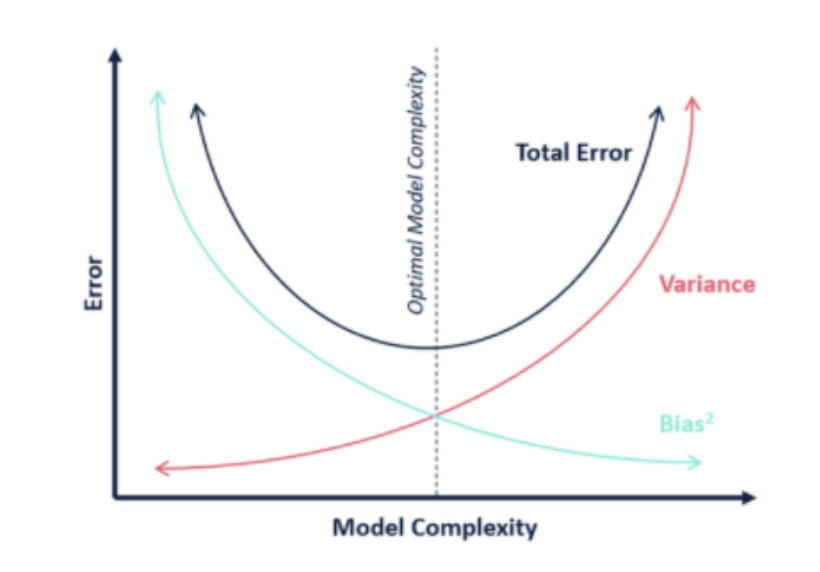

# **Penalization Methods**

**Regularization** is a method used to make complex models simpler by penalising coefficients to reduce their magnitude, variance in the training set and in turn, reduce overfitting in the model.

Regularization occurs by shrinking the coefficients in the model towards zero such that the complexity term added to the model will result in a bigger loss for models with a higher complexity . There are two types of regression techniques such as 
- Ridge and Lasso regression.

**Ridge Regression** - known as L2 regularization - uses a penalty term to shrink the magnitude of coefficients towards zero without eliminating them. 

The shrinkage prevents overfitting caused by the complexity of the model or  collinearity. It includes the square magnitude of the coefficients to the loss function as the penalty term.




In [11]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)


Ridge(alpha=0.5)

**Feature Selection and Lasso Regression**

Some datasets can be high dimensional with a very high number of features and some of them not contributing towards predicting the response variable. 

As a result, it becomes more computationally expensive to train a model and can also introduce noise causing the model to perform poorly.

The process of selecting significant features that contribute the most in obtaining high performing models is known as ***feature selection.*** 

**Lasso regression (Least Absolute Shrinkage and Selection Operator)** reduces overfitting of the dataset by penalising the coefficients such that some coefficients are shrunk to zero and, indirectly performs feature selection by selecting only a subset of features leaving only relevant variables that minimize prediction errors.

By using L1 regularisation, it includes the absolute value of the magnitude to the loss function. The application of L1 regularisation results in simpler and sparse models that allow for better interpretation. Although lasso regression helps prevent overfitting, one major limitation is that it does not consider other factors when eliminating predictors. For example, it arbitrarily  eliminates a variable from a correlated pair which might not be a good rational from a human perspective. 

In [12]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

# comparing the effects of regularisation

# this function returns the weight of every feature
def get_weights_df(model, feat, col_name):
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

linear_model_weights_df = get_weights_df(linear_model, x_train, 'Linear_Model_Weights')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Model_Weights')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_Model_Weights')

final_weights = pd.merge(linear_model_weights_df, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')


In [13]:
final_weights

,Features,Linear_Model_Weights,Ridge_Model_Weights,Lasso_Model_Weights
0,surface_area,-5.966585e+12,-0.062275,0.000000
1,relative_compactness,-6.064125e-01,-0.283471,-0.027719
2,orientation,-3.150940e-03,0.003369,0.000000
3,glazing_area_distribution,1.922846e-02,0.029088,0.021431
4,glazing_area,2.289743e-01,0.212449,0.206132
5,overall_height,3.862305e-01,0.442467,0.463482
6,wall_area,3.480508e+12,0.103061,0.200087
7,roof_area,4.474939e+12,-0.163192,-0.000000


**Elastic Net Regression**

This is simply a combination of the L1 and L2 penalties from ridge and lasso regression. This method ***arose from the need to overcome the limitations of lasso regression***. It regularizes and performs feature selection simultaneously by initially finding the optimal values of the coefficients as in ridge then performs a shrinkage.

# **Non-Linear Regression Methods and Other Recommendations**

**Model Tuning and choosing parameters**

There has to be a search for the combination of parameters(***hyperparameters***) that will result in the optimal performance of the model. This process of exploring a range of values is called ***hyperparameter tuning***. 

Model parameters are learnt during the training phase while setting hyperparameters is exclusive of the training process. Ideally, when hyperparameter tuning is completed, the result is the best parameters for the model.

- Grid Search Method

It explores the combination of a grid of parameters such that for every combination of parameters, a model is built and evaluated then the model with the best result selected and its corresponding parameters. 

It is computationally expensive, setting up a grid search is quite easy.

- Random Seach Method

Randomly combines parameter values in the grid to build and evaluate models. It does not sequentially combine all parameters as in grid search instead, it allows for a quick exploration of the entire action space to reach optimal values.



**Data splitting, resampling and cross validation strategy**


***Data splitting*** involves setting aside a portion of the dataset for testing (out of sample or hold-out) and evaluating the performance of the model to provide unbiased results while the rest is used in fitting the model.

Common practice is to split the dataset into training, validation or dev and testing sets where the validation set is used to tune the hyperparameters to select the best values for the model. 

***Resampling*** involves repeatedly selecting samples from the original dataset and using these samples to obtain more information about the model. 

This can create different samples of the training set and another for evaluation. 

***Cross validation*** is a method used to generalise and prevent overfitting in machine learning.

